In [1]:
%matplotlib inline
import tensorflow as tf
import math
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import *
from tensorflow.keras.utils import *
from tensorflow.keras.datasets import fashion_mnist

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train.reshape(60000,784)/255.0, x_test.reshape(10000,784)/255.0

In [3]:
epoch = 100
lr = 1e-2
batch_size = 256
initializer = initializers.he_normal(seed=114)

In [4]:
def step_decay(epoch):
    initial_lrate = 0.01
    drop = 0.9
    epochs_drop = 10
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate

In [5]:
lrate = callbacks.LearningRateScheduler(step_decay)

In [6]:
def basic_layer(node):
    layer = models.Sequential()
    layer.add(layers.Dense(node, kernel_initializer=initializer))
    layer.add(layers.Activation('elu'))
    return layer

In [7]:
model = models.Sequential()
model.add(layers.Dense(128, input_dim=784))
model.add(layers.Activation('elu'))
model.add(basic_layer(128))
model.add(basic_layer(256))
model.add(basic_layer(256))
model.add(basic_layer(512))
model.add(basic_layer(512))
model.add(basic_layer(256))
model.add(basic_layer(128))
model.add(basic_layer(64))
model.add(layers.Dense(10, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
activation (Activation)      (None, 128)               0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 128)               16512     
_________________________________________________________________
sequential_2 (Sequential)    (None, 256)               33024     
_________________________________________________________________
sequential_3 (Sequential)    (None, 256)               65792     
_________________________________________________________________
sequential_4 (Sequential)    (None, 512)               131584    
_________________________________________________________________
sequential_5 (Sequential)    (None, 512)               2

In [9]:
sgd = optimizers.SGD(lr=lr)
model.compile(optimizer= sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, 
                    y_train, 
                    epochs=epoch, 
                    batch_size=batch_size,
                    validation_data=(x_test, y_test), 
                    callbacks=[lrate])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 2s 35us/sample - loss: 0.6831 - accuracy: 0.7566 - val_loss: 0.5216 - val_accuracy: 0.8123
Epoch 2/100
60000/60000 [==============================] - 1s 19us/sample - loss: 0.4743 - accuracy: 0.8271 - val_loss: 0.4971 - val_accuracy: 0.8230
Epoch 3/100
60000/60000 [==============================] - 1s 19us/sample - loss: 0.4249 - accuracy: 0.8451 - val_loss: 0.4650 - val_accuracy: 0.8281
Epoch 4/100
60000/60000 [==============================] - 1s 19us/sample - loss: 0.3984 - accuracy: 0.8545 - val_loss: 0.4520 - val_accuracy: 0.8334
Epoch 5/100
60000/60000 [==============================] - 1s 19us/sample - loss: 0.3773 - accuracy: 0.8620 - val_loss: 0.4734 - val_accuracy: 0.8300
Epoch 6/100
60000/60000 [==============================] - 1s 18us/sample - loss: 0.3625 - accuracy: 0.8676 - val_loss: 0.4673 - val_accuracy: 0.8265
Epoch 7/100
60000/60000 [=========================

Epoch 55/100
60000/60000 [==============================] - 1s 21us/sample - loss: 0.1630 - accuracy: 0.9405 - val_loss: 0.3504 - val_accuracy: 0.8804
Epoch 56/100
60000/60000 [==============================] - 1s 22us/sample - loss: 0.1607 - accuracy: 0.9424 - val_loss: 0.3650 - val_accuracy: 0.8743
Epoch 57/100
60000/60000 [==============================] - 1s 20us/sample - loss: 0.1589 - accuracy: 0.9426 - val_loss: 0.3907 - val_accuracy: 0.8703
Epoch 58/100
60000/60000 [==============================] - 1s 20us/sample - loss: 0.1575 - accuracy: 0.9444 - val_loss: 0.3583 - val_accuracy: 0.8785
Epoch 59/100
60000/60000 [==============================] - 1s 20us/sample - loss: 0.1557 - accuracy: 0.9441 - val_loss: 0.3700 - val_accuracy: 0.8751
Epoch 60/100
60000/60000 [==============================] - 1s 20us/sample - loss: 0.1516 - accuracy: 0.9463 - val_loss: 0.3551 - val_accuracy: 0.8812
Epoch 61/100
60000/60000 [==============================] - 1s 20us/sample - loss: 0.1508 - ac

In [10]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

10000/1 - 1s - loss: 0.2219 - accuracy: 0.8842


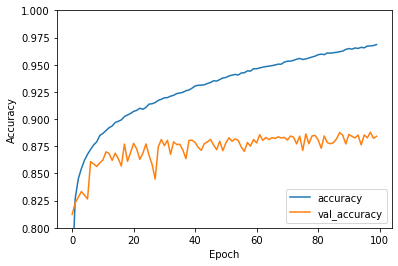

In [13]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.legend(loc='lower right')
# plt.savefig("ann_acc.png", dpi=500)

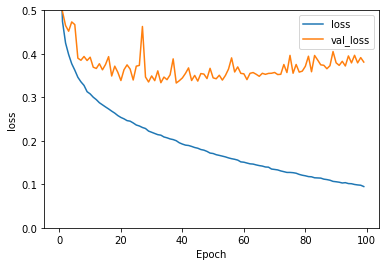

In [14]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0, 0.5])
plt.legend(loc='upper right')
# plt.savefig("ann_loss.png", dpi=500)